In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import mysql.connector

In [3]:
con=mysql.connector.connect(
host='localhost',
port=3306,
user='root',
password='Data@123')

In [4]:
def query(sql):
    q=pd.read_sql_query(sql,con)
    return q

In [5]:
Databases=query('show databases')
Databases


,Database
0,information_schema
1,mysql
2,performance_schema
3,projects
4,sakila
5,sys
6,testdb
7,world


In [6]:
tables=query('use projects')

TypeError: 'NoneType' object is not iterable

In [7]:
table=query('show tables')
table

,Tables_in_projects
0,studmarks


In [8]:
StudentMarks=query('select * from studmarks')
StudentMarks

,name,gender,dob,maths,physics,chemistry,english,biology,economics,history,civics
0,John,M,1988-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53
5,Annu,F,1988-04-05,45,87,52,89,55,89,87,52
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77


In [9]:
df=pd.DataFrame(StudentMarks)

In [10]:
df.shape

(10, 11)

In [11]:
df.describe()

,maths,physics,chemistry,english,biology,economics,history,civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
name         10 non-null object
gender       10 non-null object
dob          10 non-null object
maths        10 non-null int64
physics      10 non-null int64
chemistry    10 non-null int64
english      10 non-null int64
biology      10 non-null int64
economics    10 non-null int64
history      10 non-null int64
civics       10 non-null int64
dtypes: int64(8), object(3)
memory usage: 960.0+ bytes


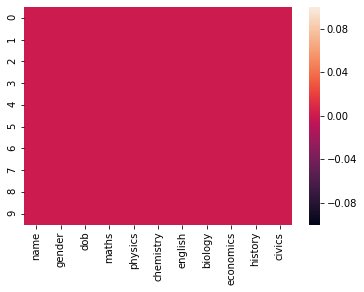

In [13]:
sns.heatmap(df.isnull())

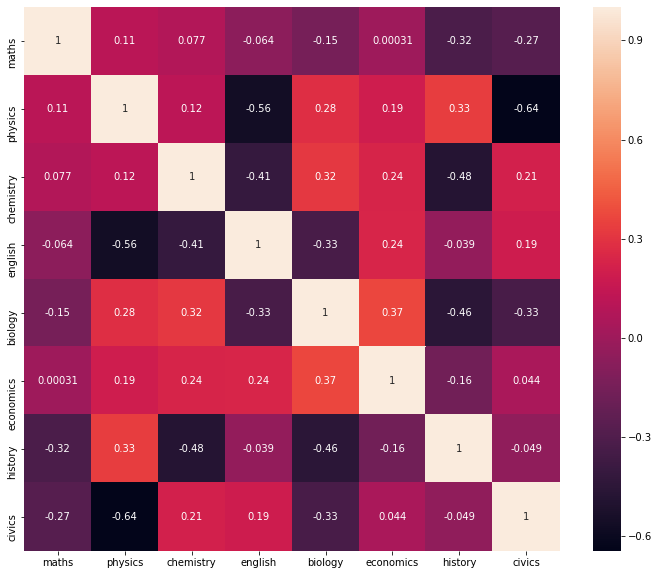

In [14]:
corr_heatmap=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_heatmap,annot=True)

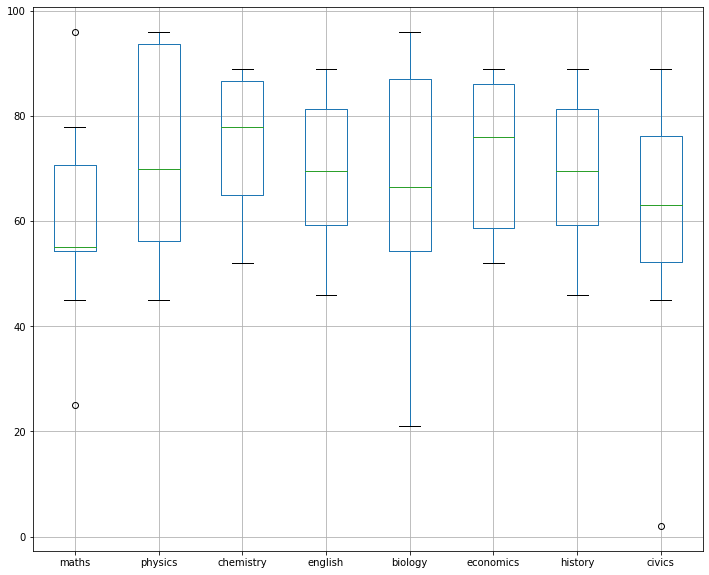

In [15]:
df.boxplot(column=['maths', 'physics', 'chemistry', 'english', 'biology', 'economics', 'history', 'civics'],figsize=(12,10))

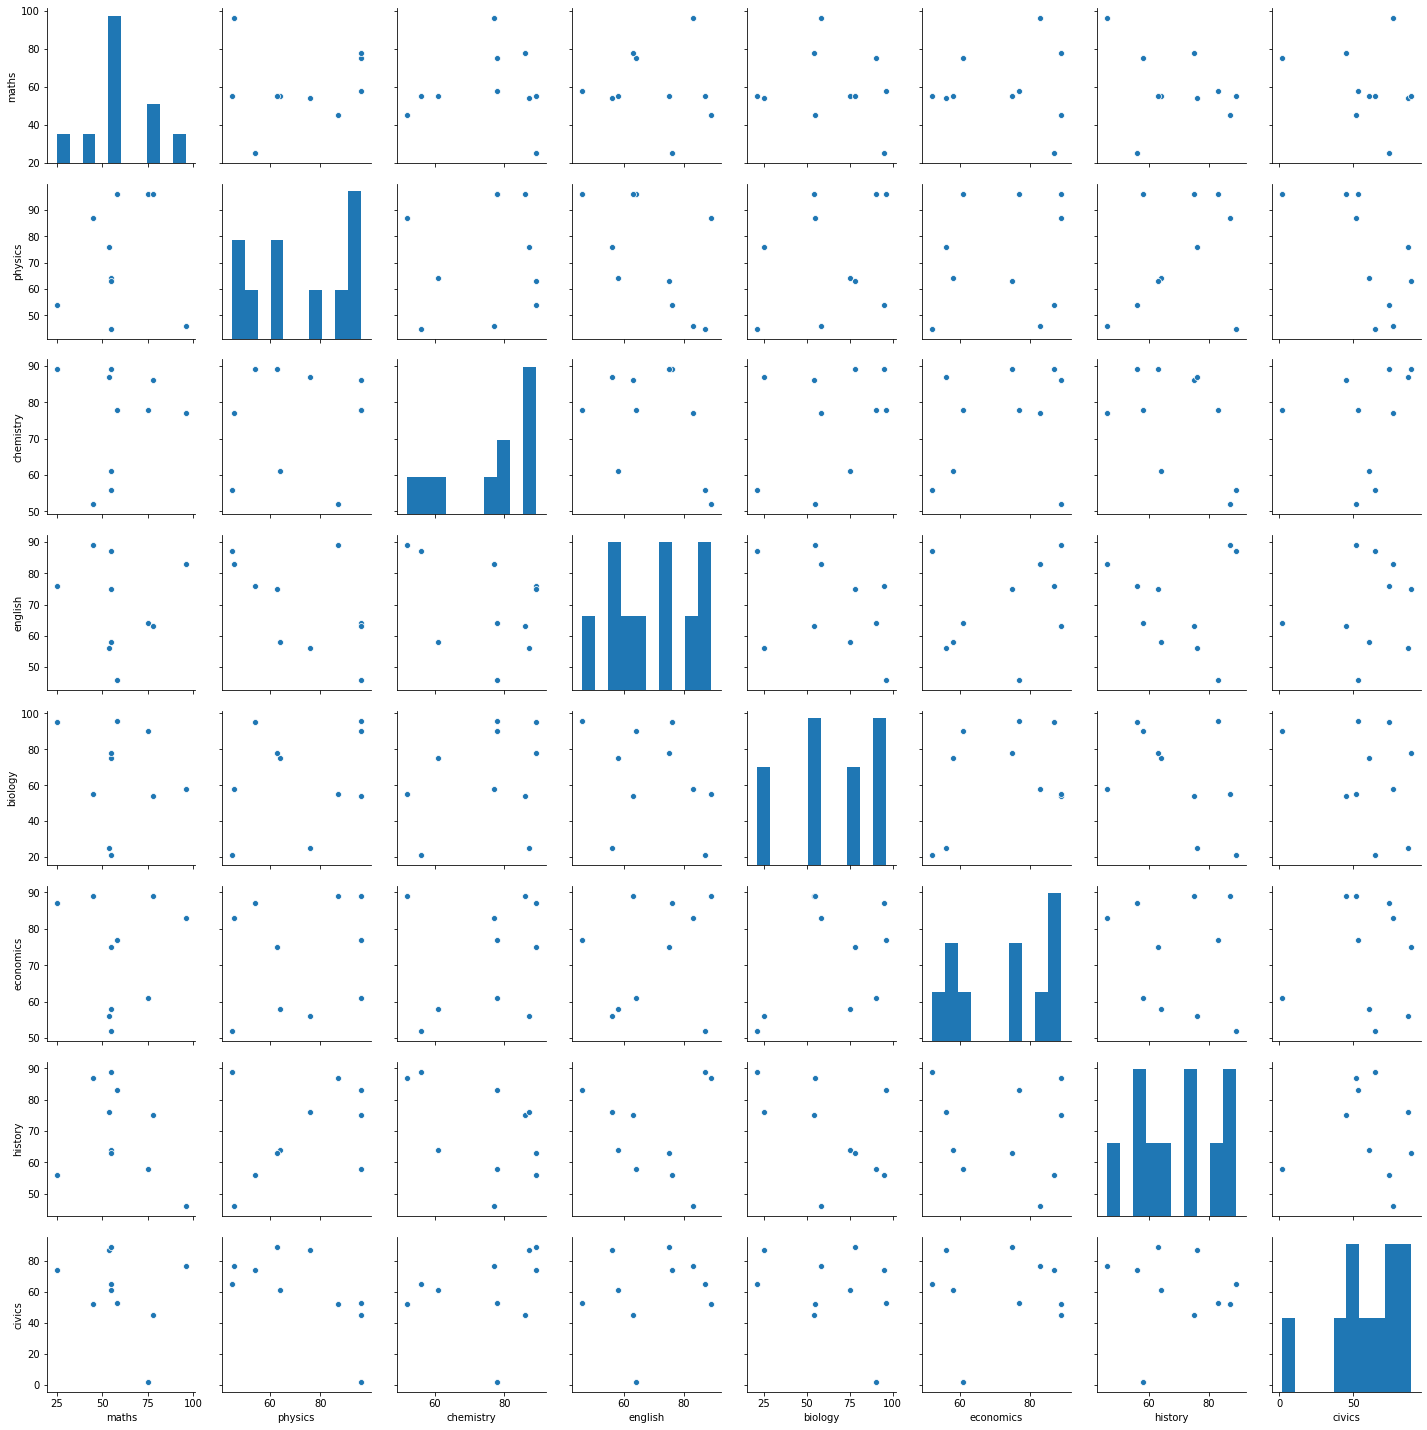

In [16]:
sns.pairplot(df,kind='scatter')
#we can use reg also in kind for regression type problem